# Data Loading & EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Load the dataset
df = pd.read_csv("D2.csv")

In [3]:
# Display initial rows to get an overview of the data
print("First 3 rows:")
print(df.head(3))

print("\nLast 3 rows:")
print(df.tail(3))

print("\nRandom sample of 5 rows:")
print(df.sample(5))

First 3 rows:
                                               posts    status  intensity
0  I know as parent of child with down syndrome t...  negative         -1
1  but in my heart I know this is the future prom...   neutral          0
2  I have mylefibrosis which turn to leukemia the...  negative         -1

Last 3 rows:
                                                   posts    status  intensity
10389  the doctor advise we he could not remove the a...   neutral          0
10390  my 66 year old father have been through so muc...   neutral          0
10391  I have bein have a bloody stool since last yea...  negative         -1

Random sample of 5 rows:
                                                  posts         status  \
4981  I have been really anxious about the symptom I...       negative   
9756  and 5009 cigarette not smoke it is hard to bel...       positive   
4816  I was diagnose with stage iv colon cancer in d...  very negative   
3279  hi everyone I am a 14 y o female and

In [4]:
# Display initial data overview
print("First 5 rows of the dataset:")
print(df.head())

print("\nLast 5 rows of the dataset:")
print(df.tail())

print("\nRandom sample of 5 rows:")
print(df.sample(5))

First 5 rows of the dataset:
                                               posts    status  intensity
0  I know as parent of child with down syndrome t...  negative         -1
1  but in my heart I know this is the future prom...   neutral          0
2  I have mylefibrosis which turn to leukemia the...  negative         -1
3  from one of my health group subject wayne dyer...   neutral          0
4  gmos now link to leukemia http nsnbc I 2013 07...   neutral          0

Last 5 rows of the dataset:
                                                   posts         status  \
10387  hey everyone I am a 25 year old male I work ou...       negative   
10388  have surgery for stage 1 colon cancer 1 year a...  very negative   
10389  the doctor advise we he could not remove the a...        neutral   
10390  my 66 year old father have been through so muc...        neutral   
10391  I have bein have a bloody stool since last yea...       negative   

       intensity  
10387         -1  
10388    

In [5]:
# Drop the unnecessary column if it exists
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
# Check the distribution of mental health statuses
print("\nStatus Value Counts:")
print(df['status'].value_counts())

print("\nUnique Statuses:")
print(df['status'].unique())

print("\nNumber of Unique Statuses:")
print(df['status'].nunique())


Status Value Counts:
neutral          4375
negative         4112
very negative    1155
positive          750
Name: status, dtype: int64

Unique Statuses:
['negative' 'neutral' 'positive' 'very negative']

Number of Unique Statuses:
4


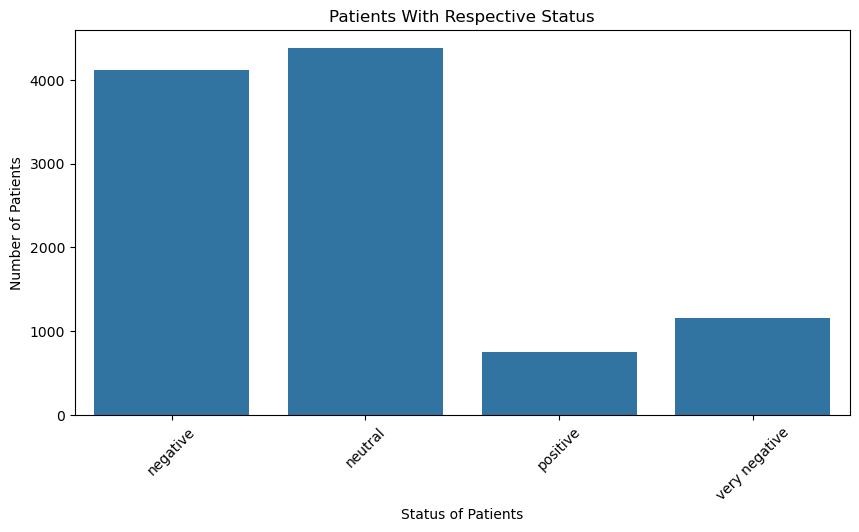

In [7]:
# Visualize the distribution of statuses with a count plot
plt.figure(figsize=(10, 5))
sns.countplot(x='status', data=df)
plt.xlabel("Status of Patients")
plt.ylabel("Number of Patients")
plt.title("Patients With Respective Status")
plt.xticks(rotation=45)
plt.show()

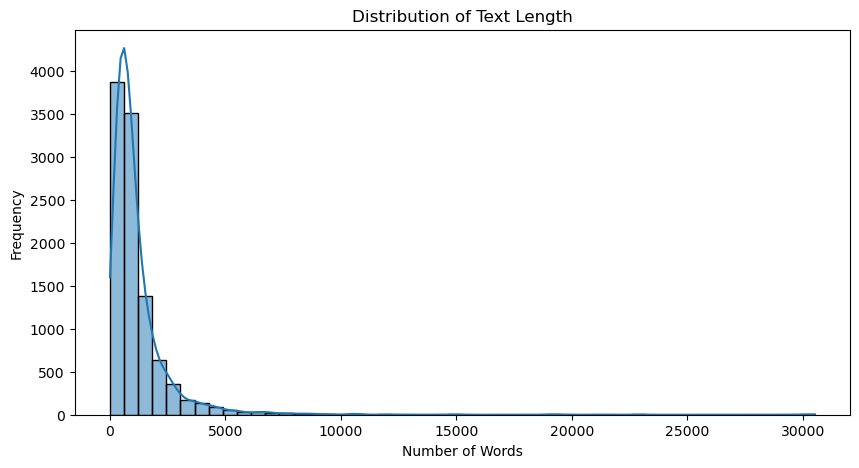

In [8]:
#Distribution of Text Length 

df['text_length'] = df['posts'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 5))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("Distribution of Text Length")
plt.show()

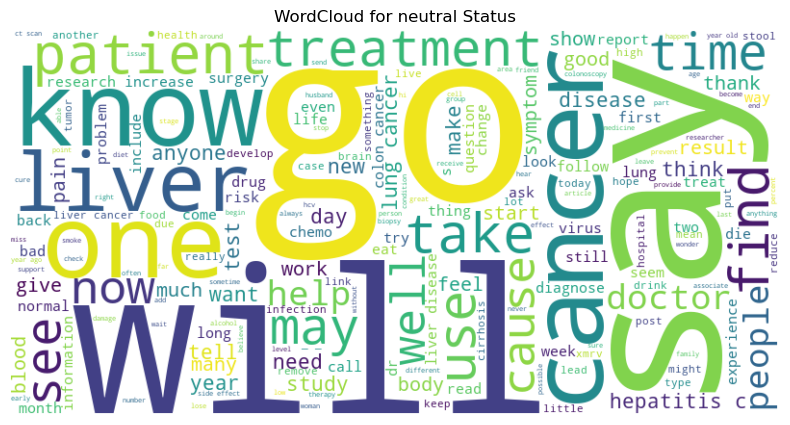

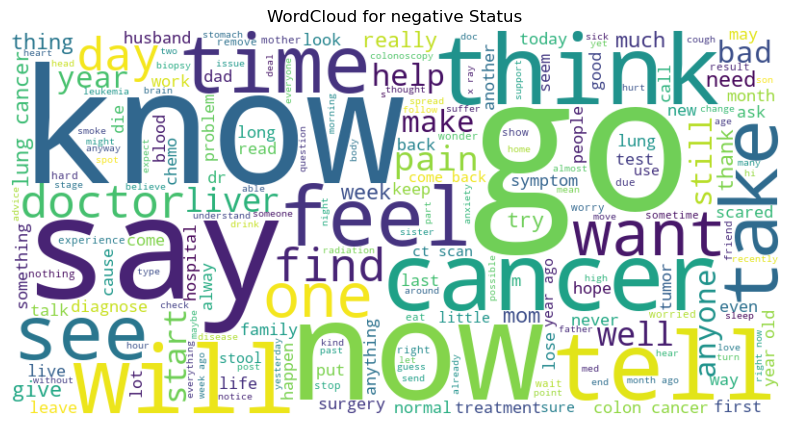

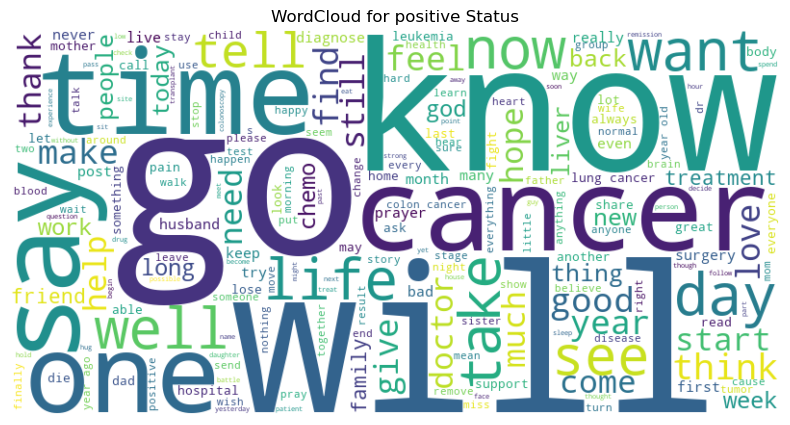

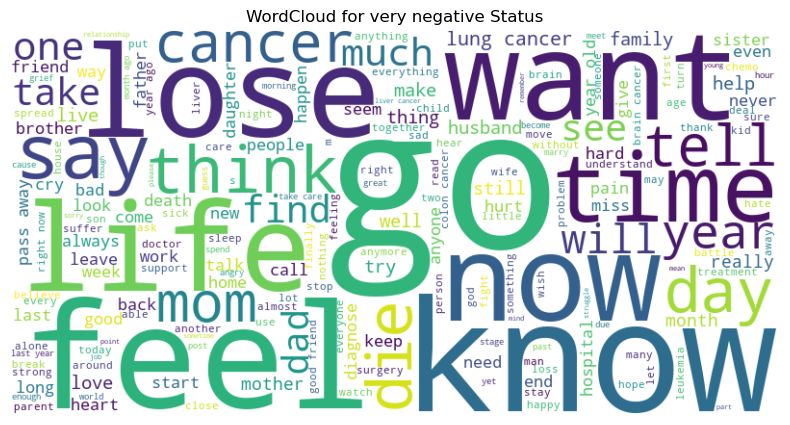

In [9]:
# Generate WordClouds for Each Status
from wordcloud import WordCloud

# Define the statuses for which you want to create the wordclouds
statuses = ["neutral", "negative","positive","very negative"]

for status in statuses:
    # Filter the dataframe for the current status and combine all text entries into a single string
    status_text = " ".join(df[df['status'] == status]['posts'].dropna().astype(str))
    
    # Only generate and plot the wordcloud if there is text data for the status
    if status_text:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(status_text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"WordCloud for {status} Status")
        plt.show()

# Data Cleaning and Resampling

In [10]:
from sklearn.utils import resample

In [11]:
# Display data information before cleaning
print("Data Information Before Cleaning:")
print(df.info())
print("\nMissing values in each column:")
print(df.isna().sum())

Data Information Before Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10392 entries, 0 to 10391
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   posts        10391 non-null  object
 1   status       10392 non-null  object
 2   intensity    10392 non-null  int64 
 3   text_length  10392 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 324.9+ KB
None

Missing values in each column:
posts          1
status         0
intensity      0
text_length    0
dtype: int64


In [12]:
# Drop rows with missing values
df.dropna(inplace=True)
print("\nShape after dropping missing values:", df.shape)


Shape after dropping missing values: (10391, 4)


In [13]:
# Check the distribution of 'status' before resampling
print("\nStatus Value Counts before resampling:")
print(df['status'].value_counts())



Status Value Counts before resampling:
neutral          4374
negative         4112
very negative    1155
positive          750
Name: status, dtype: int64


In [14]:
# Define a function to resample the dataset for class balancing
def resample_data(data):
    # Find the maximum count among all statuses
    max_count = data['status'].value_counts().max()
    
    # Initialize an empty DataFrame to store resampled data
    resampled_data = pd.DataFrame()
    
    # Loop through each unique status and resample if needed
    for status in data['status'].unique():
        subset = data[data['status'] == status]
        if len(subset) < max_count:
            # Resample with replacement to match the maximum count
            subset_resampled = resample(subset, replace=True, n_samples=max_count, random_state=42)
            resampled_data = pd.concat([resampled_data, subset_resampled])
        else:
            resampled_data = pd.concat([resampled_data, subset])
    
    return resampled_data


In [15]:
# Apply the resampling function to balance the classes
df = resample_data(df)

In [16]:
# Verify the resampled data
print("\nStatus Value Counts after resampling:")
print(df['status'].value_counts())
print("\nShape of resampled data:", df.shape)



Status Value Counts after resampling:
negative         4374
neutral          4374
positive         4374
very negative    4374
Name: status, dtype: int64

Shape of resampled data: (17496, 4)


In [17]:
# Check for duplicate rows
duplicates_count = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates_count)


Number of duplicate rows: 8600


# Text Preprocessing, Data Splitting, and TF-IDF Vectorization

In [18]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [19]:
# Download necessary NLTK resources
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kaiki\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kaiki\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [20]:
# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [21]:
# Define a function to preprocess text data using lemmatization
def preprocess_text(text):
    # Remove non-alphanumeric characters and convert text to lowercase
    text = re.sub('[^a-zA-Z0-9\s]', '', text.lower())
    # Apply lemmatization to each word
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(lemmatized_words)

# Apply the preprocessing function to the 'posts' column
df['posts'] = df['posts'].apply(preprocess_text)

In [22]:
# Split the data into features and labels
X = df['posts']
y = df['status']

In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Print the shapes of the train and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (13996,) (13996,)
Testing set shape: (3500,) (3500,)


In [25]:
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

In [26]:
# Fit the vectorizer on the training data and transform both training and testing data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Print the shapes of the vectorized data
print("TF-IDF training data shape:", X_train_tfidf.shape)
print("TF-IDF testing data shape:", X_test_tfidf.shape)

TF-IDF training data shape: (13996, 33055)
TF-IDF testing data shape: (3500, 33055)


# Model Training with Extra Trees

In [28]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV, learning_curve
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve, auc,
    precision_recall_curve, average_precision_score
)
from sklearn.preprocessing import label_binarize
import joblib

In [29]:
from sklearn.ensemble import ExtraTreesClassifier

In [30]:
# Define a small search space *excluding* n_estimators so it can be the "resource"
param_dist_et = {
    'max_depth':         [None, 30, 50],
    'min_samples_split': [2, 5],
    'min_samples_leaf':  [1, 2],
    'max_features':      ['sqrt', 0.5],
    'bootstrap':         [True]
}

In [31]:
# Set up the halving search over n_estimators
halving_et = HalvingRandomSearchCV(
    estimator=ExtraTreesClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_dist_et,
    resource='n_estimators',    
    min_resources=50,           
    max_resources=450,          
    factor=3,                   
    cv=3,
    scoring='accuracy',
    random_state=42,
    verbose=1,
    n_jobs=-1
)



In [32]:
# Run the search
halving_et.fit(X_train_tfidf, y_train)


n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 50
max_resources_: 450
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 9
n_resources: 50
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 1
n_candidates: 3
n_resources: 150
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 2
n_candidates: 1
n_resources: 450
Fitting 3 folds for each of 1 candidates, totalling 3 fits


HalvingRandomSearchCV(cv=3,
                      estimator=ExtraTreesClassifier(n_jobs=-1,
                                                     random_state=42),
                      max_resources=450, min_resources=50, n_jobs=-1,
                      param_distributions={'bootstrap': [True],
                                           'max_depth': [None, 30, 50],
                                           'max_features': ['sqrt', 0.5],
                                           'min_samples_leaf': [1, 2],
                                           'min_samples_split': [2, 5]},
                      random_state=42, resource='n_estimators',
                      scoring='accuracy', verbose=1)

In [33]:
# Grab the best model and evaluate
best_et = halving_et.best_estimator_
print("Best params:",           halving_et.best_params_)
print("Best n_estimators:",     halving_et.best_params_['n_estimators'])
print("Test Accuracy: {:.2f}%".format(
    accuracy_score(y_test, best_et.predict(X_test_tfidf)) * 100
))

Best params: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True, 'n_estimators': 450}
Best n_estimators: 450
Test Accuracy: 93.14%


In [34]:
y_pred = best_et.predict(X_test_tfidf)
y_proba = best_et.predict_proba(X_test_tfidf)


In [38]:
# Build DataFrame of test texts, true labels, and this model’s predictions
df_et = pd.DataFrame({
    'text':       X_test.reset_index(drop=True),
    'true_label': y_test.reset_index(drop=True),
    'et_pred':    y_pred
})
df_et.to_csv('predictions_et.csv', index=False)